In [19]:
import numpy as np
import pandas as pd
import os

In [9]:
file_path = '/scratch/izar/ckli/corruptions_benchmark/all/results_5'
rp_item = np.load(file_path + '/rp-item.npy', allow_pickle=True)
rp_val = np.load(file_path + '/rp-vals.npy', allow_pickle=True)
# /scratch/izar/ckli/corruptions_benchmark/all/results_5/rp-item.npy

In [10]:
rp_item

array([{'name': '/scratch/izar/ckli/corruptions_benchmark/all/bit_error_5_0029_render_140.png', 'vals': [0.008053655389451459, 0.009646229551920982]},
       {'name': '/scratch/izar/ckli/corruptions_benchmark/all/bit_error_5_0031_render_070.png', 'vals': [0.009946079316297053, 0.012952274511325064]},
       {'name': '/scratch/izar/ckli/corruptions_benchmark/all/bit_error_5_0049_render_280.png', 'vals': [0.00797059556364312, 0.009626044187558594]},
       {'name': '/scratch/izar/ckli/corruptions_benchmark/all/bit_error_5_0101_render_260.png', 'vals': [0.01047679532691884, 0.011951901561655326]},
       {'name': '/scratch/izar/ckli/corruptions_benchmark/all/bit_error_5_0109_render_150.png', 'vals': [0.0063000113026077335, 0.006099385064365238]},
       {'name': '/scratch/izar/ckli/corruptions_benchmark/all/color_quant_4_0029_render_140.png', 'vals': [0.01391602830092652, 0.017711167215102314]},
       {'name': '/scratch/izar/ckli/corruptions_benchmark/all/color_quant_4_0031_render_070.pn

In [15]:
names = []
chamfer_dist = []
p2s_val = []

for d in rp_item:
    names.append(d['name'])
    chamfer_dist.append(d['vals'][0])
    p2s_val.append(d['vals'][1])

In [17]:
df = pd.DataFrame({
    'Path': names,
    'Chamfer Distance': chamfer_dist,
    'P2S': p2s_val
})


,Path,Chamfer Distance,P2S
0,/scratch/izar/ckli/corruptions_benchmark/all/b...,0.008054,0.009646
1,/scratch/izar/ckli/corruptions_benchmark/all/b...,0.009946,0.012952
2,/scratch/izar/ckli/corruptions_benchmark/all/b...,0.007971,0.009626
3,/scratch/izar/ckli/corruptions_benchmark/all/b...,0.010477,0.011952
4,/scratch/izar/ckli/corruptions_benchmark/all/b...,0.006300,0.006099
...,...,...,...
60,/scratch/izar/ckli/corruptions_benchmark/all/z...,0.008685,0.010855
61,/scratch/izar/ckli/corruptions_benchmark/all/z...,0.006490,0.006939
62,/scratch/izar/ckli/corruptions_benchmark/all/z...,0.009468,0.011857
63,/scratch/izar/ckli/corruptions_benchmark/all/z...,0.011032,0.012889


In [20]:
df['Path'] = df['Path'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])
df

,Path,Chamfer Distance,P2S
0,bit_error_5_0029_render_140,0.008054,0.009646
1,bit_error_5_0031_render_070,0.009946,0.012952
2,bit_error_5_0049_render_280,0.007971,0.009626
3,bit_error_5_0101_render_260,0.010477,0.011952
4,bit_error_5_0109_render_150,0.006300,0.006099
...,...,...,...
60,zoom_blur_2d_2_0029_render_140,0.008685,0.010855
61,zoom_blur_2d_2_0031_render_070,0.006490,0.006939
62,zoom_blur_2d_2_0049_render_280,0.009468,0.011857
63,zoom_blur_2d_2_0101_render_260,0.011032,0.012889


In [21]:
df['Group'] = df['Path'].apply(lambda x: "_".join(x.split("_")[:-3]))
df

,Path,Chamfer Distance,P2S,Group
0,bit_error_5_0029_render_140,0.008054,0.009646,bit_error_5
1,bit_error_5_0031_render_070,0.009946,0.012952,bit_error_5
2,bit_error_5_0049_render_280,0.007971,0.009626,bit_error_5
3,bit_error_5_0101_render_260,0.010477,0.011952,bit_error_5
4,bit_error_5_0109_render_150,0.006300,0.006099,bit_error_5
...,...,...,...,...
60,zoom_blur_2d_2_0029_render_140,0.008685,0.010855,zoom_blur_2d_2
61,zoom_blur_2d_2_0031_render_070,0.006490,0.006939,zoom_blur_2d_2
62,zoom_blur_2d_2_0049_render_280,0.009468,0.011857,zoom_blur_2d_2
63,zoom_blur_2d_2_0101_render_260,0.011032,0.012889,zoom_blur_2d_2


In [33]:
grouped = df.groupby('Group')
mean_result = grouped.mean()
mean_result

,Chamfer Distance,P2S
Group,,
bit_error_5,0.008549,0.010055
color_quant_4,0.010700,0.012955
fog_3d_2,0.008443,0.009748
h265_abr_3,0.008715,0.010183
h265_crf_4,0.008942,0.010442
iso_noise_4,0.011023,0.014185
low_light_4,0.010027,0.012901
near_focus_1,0.007988,0.009326
render,0.008046,0.008954


In [34]:
title_dict = {
    'bit_error_5': 'Bit Error ',
    'color_quant_4': 'Color Quantization ',
    'fog_3d_2': 'Fog 3D',
    'h265_abr_3': 'H265 abr',
    'h265_crf_4': 'H265 crf',
    'iso_noise_4': 'ISO Noise',
    'low_light_4': 'Low Light',
    'near_focus_1': 'Near Focus',
    'render': 'Uncorrputed with fine-tuning',
    'roll_80': 'Roll',
    'xy_motion_blur_1': 'XY Motion Blur',
    'z_motion_blur_1': 'Z Motion Blur',
    'zoom_blur_2d_2': 'Zoom Blur 2D',
}

In [36]:
mean_result.index = mean_result.index.to_series().replace(title_dict)
mean_result

,Chamfer Distance,P2S
Group,,
Bit Error,0.008549,0.010055
Color Quantization,0.010700,0.012955
Fog 3D,0.008443,0.009748
H265 abr,0.008715,0.010183
H265 crf,0.008942,0.010442
ISO Noise,0.011023,0.014185
Low Light,0.010027,0.012901
Near Focus,0.007988,0.009326
Uncorrputed with fine-tuning,0.008046,0.008954


In [50]:
def get_average(file_path):
    rp_item = np.load(file_path + '/rp-item.npy', allow_pickle=True)
    names = []
    chamfer_dist = []
    p2s_val = []

    for d in rp_item:
        names.append(d['name'])
        chamfer_dist.append(d['vals'][0])
        p2s_val.append(d['vals'][1])
    df = pd.DataFrame({
        'Path': names,
        'Chamfer Distance': chamfer_dist,
        'P2S': p2s_val
    })
    df['Path'] = df['Path'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])
    df['Group'] = df['Path'].apply(lambda x: "_".join(x.split("_")[:-3]))
    grouped = df.groupby('Group')
    mean_result = grouped.mean()
    title_dict = {
        'bit_error_5': 'Bit Error ',
        'color_quant_4': 'Color Quantization ',
        'fog_3d_2': 'Fog 3D',
        'h265_abr_3': 'H265 abr',
        'h265_crf_4': 'H265 crf',
        'iso_noise_4': 'ISO Noise',
        'low_light_4': 'Low Light',
        'near_focus_1': 'Near Focus',
        'render': 'Uncorrputed',
        'roll_80': 'Roll',
        'xy_motion_blur_1': 'XY Motion Blur',
        'z_motion_blur_1': 'Z Motion Blur',
        'zoom_blur_2d_2': 'Zoom Blur 2D',
    }
    mean_result.index = mean_result.index.to_series().replace(title_dict)
    return mean_result

In [51]:
mean_5 = get_average(file_path='/scratch/izar/ckli/corruptions_benchmark/all/results_5')
mean_5

,Chamfer Distance,P2S
Group,,
Bit Error,0.008549,0.010055
Color Quantization,0.010700,0.012955
Fog 3D,0.008443,0.009748
H265 abr,0.008715,0.010183
H265 crf,0.008942,0.010442
ISO Noise,0.011023,0.014185
Low Light,0.010027,0.012901
Near Focus,0.007988,0.009326
Uncorrputed,0.008046,0.008954


In [52]:
mean_10 = get_average(file_path='/scratch/izar/ckli/corruptions_benchmark/all/results_10')
mean_10

,Chamfer Distance,P2S
Group,,
Bit Error,0.011278,0.013156
Color Quantization,0.018656,0.015856
Fog 3D,0.010509,0.013402
H265 abr,0.010266,0.014028
H265 crf,0.010886,0.014211
ISO Noise,0.020053,0.017604
Low Light,0.021150,0.017618
Near Focus,0.009535,0.012050
Uncorrputed,0.010323,0.012978


In [62]:
mean_24 = get_average(file_path='/scratch/izar/ckli/corruptions_benchmark/all/results_24')
mean_24

,Chamfer Distance,P2S
Group,,
Bit Error,0.020796,0.036112
Color Quantization,0.023209,0.036894
Fog 3D,0.023346,0.040115
H265 abr,0.019920,0.033307
H265 crf,0.020523,0.034578
ISO Noise,0.023781,0.035492
Low Light,0.024730,0.037564


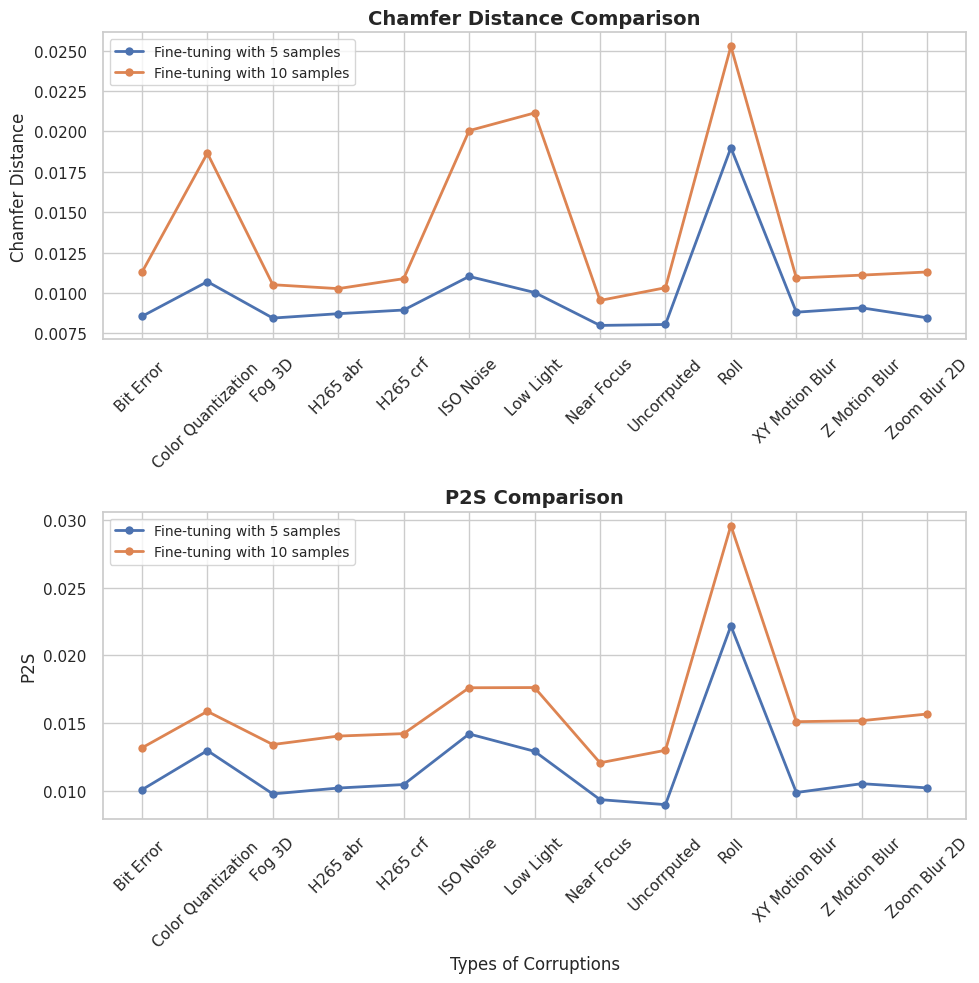

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_theme(style="whitegrid")

def compare_dfs(df1, df2):
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    ax[0].plot(df1.index, df1['Chamfer Distance'], marker='o', label='Fine-tuning with 5 samples', linewidth=2)
    ax[0].plot(df2.index, df2['Chamfer Distance'], marker='o', label='Fine-tuning with 10 samples', linewidth=2)
    ax[0].set_title('Chamfer Distance Comparison', fontweight='bold', fontsize=14)
    ax[0].set_ylabel('Chamfer Distance', fontsize=12)
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].legend(frameon=True, fontsize=10, loc='upper left')

    ax[1].plot(df1.index, df1['P2S'], marker='o', label='Fine-tuning with 5 samples', linewidth=2)
    ax[1].plot(df2.index, df2['P2S'], marker='o', label='Fine-tuning with 10 samples', linewidth=2)
    ax[1].set_title('P2S Comparison', fontweight='bold', fontsize=14)
    ax[1].set_xlabel('Types of Corruptions', fontsize=12)
    ax[1].set_ylabel('P2S', fontsize=12)
    ax[1].tick_params(axis='x', rotation=45)
    ax[1].legend(frameon=True, fontsize=10, loc='upper left')

    plt.tight_layout()

    # Save the plot to a PDF file
    plt.savefig('comparison_plot.pdf', format='pdf')

    plt.show()

# Call the function
compare_dfs(mean_5, mean_10)
